# Project 3: Poisonous Mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please **prepare your own write-up and write your own code**.

In [1]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [2]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [3]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### Part 1:

Do a principal components analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].  Also show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.

Notes:
* You can use `PCA` to produce a PCA analysis.

k Principal Component    |Explained Variance Ratio      |Cumulative Explained Variance Ratio
------------------------------------------------------------------------------------------
1                        |0.16404                       |0.16404
2                        |0.13323                       |0.29728
3                        |0.10173                       |0.39901
4                        |0.07063                       |0.46965
5                        |0.03867                       |0.50831
10                       |0.03681                       |0.65221
20                       |0.03128                       |0.80877
30                       |0.02734                       |0.89848
40                       |0.02616                       |0.95091
50                       |0.02231                       |0.98210


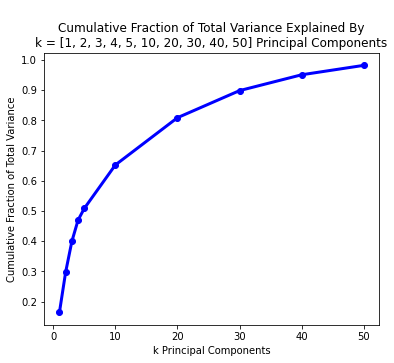

In [5]:
def P1():

### STUDENT START ###
        
    cum_tot_var_list = []
    k_list = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
    
    dash = '-'*90
    print(f'{"k Principal Component":<25s}|{"Explained Variance Ratio":<30s}|'
          f'{"Cumulative Explained Variance Ratio"}\n{dash}')
    
    for index, k in enumerate(k_list):
        pca = PCA(n_components=k)
        pca.fit_transform(train_data)
        
        # Explained variance ratio
#         explained_var_ratio = f'{pca.explained_variance_ratio_[index]:.4f}'
        explained_var_ratio = pca.explained_variance_ratio_[index]
        
        # Cumulative explained variance ratio
        sum_explained_var_ratio = np.sum(pca.explained_variance_ratio_)
        cum_tot_var_list.append(sum_explained_var_ratio)
        
        print(f'{str(k):<25s}|{str(explained_var_ratio.round(5)):<30s}|{sum_explained_var_ratio:.5f}')
    
    # Lineplot of fraction of total variance vs number of principal components
    plt.figure(figsize = (6, 5))
    plt.title(f'\nCumulative Fraction of Total Variance Explained By'
              f'\nk = {k_list} Principal Components')
    plt.plot([k for k in k_list], cum_tot_var_list[:len(k_list)+1], '-bo', linewidth=3)
    plt.xlabel('k Principal Components')
    plt.ylabel('Cumulative Fraction of Total Variance')
#     plt.show()

### STUDENT END ###

P1()

### Part 2:

PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and show as a square scatterplot. Show the positive (poisonous) examples in red and the negative (non-poisonous) examples in green. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.

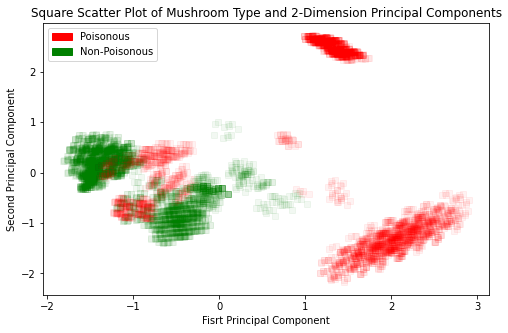

In [6]:
def P2():

### STUDENT START ###
    
    # Initialize first 2 principal components
    pca = PCA(n_components=2)
    
    # Fit train_data to PCA
    pca_model = pca.fit_transform(train_data)
    
    # Plot
    # Red - positive (poisonous)
    # Green - negative (non-poisonous)
    plt.figure(figsize = (8, 5))
    plt.title('Square Scatter Plot of Mushroom Type and 2-Dimension Principal Components')
    plt.xlabel('Fisrt Principal Component')
    plt.ylabel('Second Principal Component')
    
#     # One way of plotting
#     plt.scatter(pca_model[train_labels == 1, 0], pca_model[train_labels == 1, 1], c='r', marker='s', alpha=0.1)
#     plt.scatter(pca_model[train_labels == 0, 0], pca_model[train_labels == 0, 1], c='g', marker='s', alpha=0.01)
#     plt.legend(loc='best', labels=['Poisonous', 'Non-Poisonous'])
    
    
    # An alternative way of plotting with legends patching
    import matplotlib.patches
    color = np.where(train_labels, 'red', 'green')
    plt.scatter(pca_model[:, 0], pca_model[:, 1], c=color, marker='s', alpha=0.05)

    import matplotlib.patches as mpatches
    red_patch = mpatches.Patch(color='red', label='Poisonous')
    green_patch = mpatches.Patch(color='green', label='Non-Poisonous')
    plt.legend(loc='upper left', handles=[red_patch, green_patch])
    
### STUDENT END ###

P2()

### Part 3:

Fit a k-means cluster model with 6 clusters over the 2d projected data. As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.

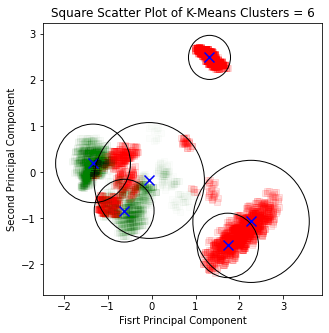

In [7]:
def P3():

### STUDENT START ###

    # Initialize first 2 principal components
    pca = PCA(n_components=2)
    
    # Fit train_data to PCA
    pca_model = pca.fit_transform(train_data)
    
    # Initialize k-means cluster
    k_means = KMeans(n_clusters=6, random_state=0)
    k_means_fit = k_means.fit(pca_model)
    k_means_predict = k_means_fit.predict(pca_model)
    
    # Determine largest distance between observations in 6 clusters
    max_dist_list = []
    for i in range(6):
        
        # Obtain points and centroid for each cluster
        cluster_points = pca_model[k_means_predict == i]
        cluster_centroid = k_means_fit.cluster_centers_[i]

        # Compute max Euclidean distance
        max_dist = 0
        for j in cluster_points:
            distance = np.linalg.norm(j - k_means_fit.cluster_centers_[i])
            if distance > max_dist:
                max_dist = distance
            else:
                continue
        
        max_dist_list.append(max_dist)

    # Square plot
    # Red - positive (poisonous)
    # Green - negative (non-poisonous)
    fig, ax = plt.subplots(figsize = (5, 5))
    ax.set_title('Square Scatter Plot of K-Means Clusters = 6')
    ax.set_xlabel('Fisrt Principal Component')
    ax.set_ylabel('Second Principal Component')
    ax.scatter(pca_model[train_labels == 1, 0], pca_model[train_labels == 1, 1], c='r', marker='s', alpha=0.1)
    ax.scatter(pca_model[train_labels == 0, 0], pca_model[train_labels == 0, 1], c='g', marker='s', alpha=0.01)

    # Plot circles
    for i, d in enumerate(max_dist_list):
        ax.scatter(k_means_fit.cluster_centers_[i, 0], k_means_fit.cluster_centers_[i, 1], c='b', marker='x', s=100)
        circle = plt.Circle(k_means_fit.cluster_centers_[i], radius = d, fill=False)
        ax.add_patch(circle)

### STUDENT END ###

P3()

### Part 4:

Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  Show square plots of the estimated density contours presented in a 4x4 grid - one row each for a number of mixture components and one column each for a convariance matrix type.  

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* You can use `contour` without the `norm` and `levels` parameters. 

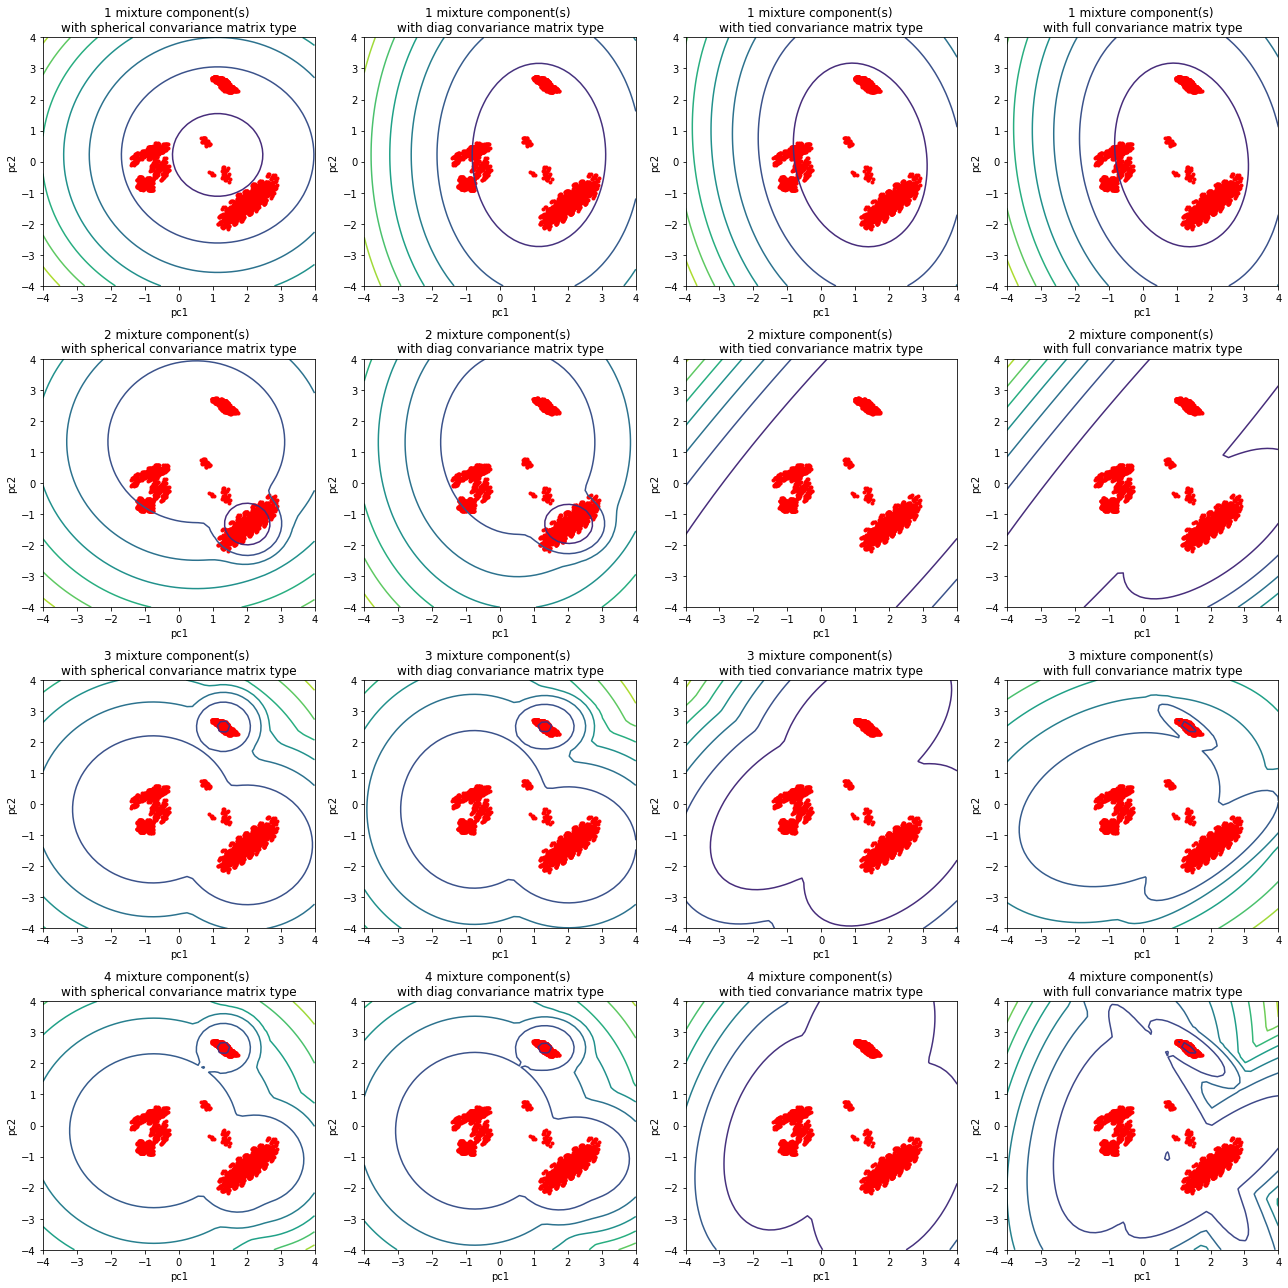

In [8]:
def P4():

### STUDENT START ###

    # Initialize first 2 principal components
    pca = PCA(n_components=2)
    
    # Fit train_data to PCA
    pca_model = pca.fit_transform(train_data)[train_labels==1] # positive examples
    
    # Initialize plot
    fig, ax = plt.subplots(4, 4, figsize=(18, 18))
    mixture_component = [1, 2, 3, 4]
    covariance_matrix_type = ['spherical', 'diag', 'tied', 'full']
    
    for n in mixture_component:
        i = 0
        for c in covariance_matrix_type:
            gmm = GaussianMixture(n_components=n, covariance_type=c, random_state=12345)
            gmm.fit(pca_model) # positive examples
            
            # display predicted scores by the model as a contour plot
            x = np.linspace(-4, 4)
            y = np.linspace(-4, 4)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -gmm.score_samples(XX)
            Z = Z.reshape(X.shape)
            
            CS = ax[n-1, i].contour(X, Y, Z)
#             CS = ax[n-1, i].contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
#                  levels=np.logspace(0, 3, 10))
        
            ax[n-1, i].scatter(pca_model[:, 0], pca_model[:, 1], marker='.', color = 'r')
            ax[n-1, i].set_title(f'{n} mixture component(s) \nwith {c} convariance matrix type')
            ax[n-1, i].set_xlabel('pc1')
            ax[n-1, i].set_ylabel('pc2')
            i += 1
            
        fig.tight_layout()

### STUDENT END ###

P4()

### Part 5:

Fit two Gaussian mixture models, one for the positive examples and one for the negative examples in your 2d projected data. Use 4 mixture components and full convariance for each model.  Predict the test example labels by picking the labels corresponding to the larger of the two models' probabilities.  What is the accuracy of you predictions on the test data?

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `GaussianMixture`'s `score_samples` method to find the probabilities.

In [9]:
def P5():

### STUDENT START ###

    pca = PCA(n_components=2) # Initialize first 2 principal components
    pca_model_train = pca.fit_transform(train_data) # Fit train_data to PCA
    pca_model_test = pca.transform(test_data) # Transform test_data into 2-dimensions
    
    # 4 mixture components and full covariance (positive)
    pca_model_pos = pca_model_train[train_labels == 1] # T/F array for positive examples
    gmm_pos = GaussianMixture(n_components=4, covariance_type='full', random_state=12345)
    gmm_pos.fit(pca_model_pos)
    pos_prob = gmm_pos.score_samples(pca_model_test) # Find probabilities
    
    # 4 mixture components and full covariance (negative)
    pca_model_neg = pca_model_train[train_labels == 0] # T/F array for negative examples
    gmm_neg = GaussianMixture(n_components=4, covariance_type='full', random_state=12345)
    gmm_neg.fit(pca_model_neg)
    neg_prob = gmm_neg.score_samples(pca_model_test) # Find probabilities
    
    # Return 1 if pos_prob > neg_prob, else return 0 - predicted label
    pred_label = np.where(pos_prob > neg_prob, 1, 0)
    
    print(f'Accuracy: {metrics.accuracy_score(test_labels, pred_label):.4f}') # Compute accuracy
    
### STUDENT END ###

P5()

Accuracy: 0.9502


### Part 6:

Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.


* For spherical, diag, and full covariance types:
  * number of parameters = (number of parameters per gmm component * number of gmm components - 1) * number of classes
  * number of parameters per gmm component includes all the means plus all the non-zero, non-duplicated values in the covariance matrix plus the mixing weight
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter


* To calculate the number of parameters for tied covariance type:
  * number of parameters = (number of parameters per class - 1) * number of classes
  * number of parameters per class includes all the means and mixing weights for all the gmm components plus all the non-zero, non-duplicated values in the one shared covariance matrix
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter

In [10]:
import pandas as pd
pd.set_option(
    'max_rows', None, 
    'max_columns', None,
    'max_colwidth', None
)
from IPython.display import display

def P6():

### STUDENT START ###
    
    # Compute model accuracy function just as in P5
    def model_accuracy(pca_num, gmm_num, cov_type):
        pca = PCA(n_components=pca_num)
        pca_model_train = pca.fit_transform(train_data) # Fit train_data to PCA
        pca_model_test = pca.transform(test_data) # Transform test_data into n-dimensions
        
        # Positive Example
        pca_model_pos = pca_model_train[train_labels == 1] # T/F array for positive examples
        gmm_pos = GaussianMixture(n_components=gmm_num, covariance_type=cov_type, random_state=12345)
        gmm_pos.fit(pca_model_pos)
        pos_prob = gmm_pos.score_samples(pca_model_test) # Find probabilities
        
        # Negative Example
        pca_model_neg = pca_model_train[train_labels == 0] # T/F array for negative examples
        gmm_neg = GaussianMixture(n_components=gmm_num, covariance_type=cov_type, random_state=12345)
        gmm_neg.fit(pca_model_neg)
        neg_prob = gmm_neg.score_samples(pca_model_test) # Find probabilities
        
        # Return 1 if pos_prob > neg_prob, else return 0 - predicted label
        pred_label = np.where(pos_prob > neg_prob, 1, 0)
        
        # Return accuracy
        return metrics.accuracy_score(test_labels, pred_label)
    
    # Compute the number of parameters function
    def num_parameters(pca_num, gmm_num, cov_type):
        num_classes = 2 # Postive + negative classes
        num_mean = pca_num*gmm_num # Sum of parameters in mean vector
        num_cov = 0 # Initialize number of parameters per gmm components
        comp_weights = gmm_num - 1
        # Referred to Slack link: 
        # https://ucbischool.slack.com/archives/C1VEW8UMU/p1564967243088800
        if cov_type == 'spherical':
            num_cov = 1*gmm_num
        elif cov_type == 'diag':
            num_cov = pca_num*gmm_num
        elif cov_type == 'full':
            num_cov = (pca_num*(pca_num+1)/2)*gmm_num
        elif cov_type == 'tied':
            num_cov = (pca_num*(pca_num+1)/2)
        
        return (num_mean+num_cov+comp_weights)*num_classes
    
    # Initialize covariance matrix type to iterate through
    covariance_matrix_type = ['spherical', 'diag', 'tied', 'full']
    
    # Initialize lists
    pca_num_list = []
    gmm_num_list = []
    cov_type_list = []
    num_params_list = []
    accuracy_list = []

    column1 = 'Num PCA Components'
    column2 = 'Num GMM Components'
    column3 = 'Covariance Type'
    column4 = 'Num of Parameters'
    column5 = 'Accuracy'
     
    dash = '-'*100
    print(f'{dash}\n{column1:<20s}|{column2:<20s}|{column3:<20s}|{column4:<20s}|{column5}\n{dash}')
    
    # For loop to iterate through 25 (50 params divided by 2 num classes) pca/gmm components
    for pca_num in range(1, 26):
        for gmm_num in range(1, 26):
            for cov_type in covariance_matrix_type:
                num_params = int(num_parameters(pca_num, gmm_num, cov_type))
                if num_params <= 50:
                    pca_num_list.append(pca_num)
                    gmm_num_list.append(gmm_num)
                    cov_type_list.append(cov_type)
                    num_params_list.append(num_params)
                    accuracy = model_accuracy(pca_num, gmm_num, cov_type)
                    accuracy_list.append(accuracy)
                    print(f'{str(pca_num):<20s}|{str(gmm_num):<20s}|{cov_type:<20s}|{str(num_params):<20s}|{accuracy:.4f}')
            
    # Best accuracy combination
    best_index = accuracy_list.index(max(accuracy_list))
    
    print(f'\nGMM Model with Best Accuracy:')
    print(f'{dash}\n{column1:<20s}|{column2:<20s}|{column3:<20s}|{column4:<20s}|{column5}\n{dash}')
    print(f'{str(pca_num_list[best_index]):<20s}|{str(gmm_num_list[best_index]):<20s}|{cov_type_list[best_index]:<20s}|{str(num_params_list[best_index]):<20s}|{max(accuracy_list):.4f}')
    
    results_df = pd.DataFrame(
    {
        'Num PCA Components': pca_num_list
        ,'Num GMM Components': gmm_num_list
        ,'Covariance Type': cov_type_list
        ,'Num of Parameters': num_params_list
        ,'Accuracy': accuracy_list
    }
    )
    display(results_df.sort_values(by='Accuracy', ascending=False).round({'Accuracy':4}).head().reset_index(drop=True))
### STUDENT END ###

P6()

----------------------------------------------------------------------------------------------------
Num PCA Components  |Num GMM Components  |Covariance Type     |Num of Parameters   |Accuracy
----------------------------------------------------------------------------------------------------
1                   |1                   |spherical           |4                   |0.8443
1                   |1                   |diag                |4                   |0.8443
1                   |1                   |tied                |4                   |0.8443
1                   |1                   |full                |4                   |0.8443
1                   |2                   |spherical           |10                  |0.8986
1                   |2                   |diag                |10                  |0.8986
1                   |2                   |tied                |8                   |0.8835
1                   |2                   |full                |10   

5                   |2                   |diag                |42                  |0.8923
5                   |3                   |spherical           |40                  |0.9662
6                   |1                   |spherical           |14                  |0.8781
6                   |1                   |diag                |24                  |0.8852
6                   |2                   |spherical           |30                  |0.9600
6                   |2                   |diag                |50                  |0.9733
6                   |3                   |spherical           |46                  |0.9680
7                   |1                   |spherical           |16                  |0.8763
7                   |1                   |diag                |28                  |0.9110
7                   |2                   |spherical           |34                  |0.9715
8                   |1                   |spherical           |18                  |0.8746

,Num PCA Components,Num GMM Components,Covariance Type,Num of Parameters,Accuracy
0,11,2,spherical,50,0.9742
1,6,2,diag,50,0.9733
2,7,2,spherical,34,0.9715
3,4,3,tied,48,0.9698
4,8,2,spherical,38,0.9689
